In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")
ctest  = test.copy()
ctrain = train.copy()

In [95]:
ctrain['train']  = 1
ctest['train']  = 0
df = pd.concat([ctrain, ctest], axis=0,sort=False)

### 1.data exploratory

 Import training and testing dataset and making a copy of the two of them 

In [96]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,0


 * we have 81 Columns in this dataset ,80 of them are features(id is only used in submission)

* our dataset is of lenght of 1460(small)==>
training this small dataset(in term of length) with 80 features can lead to overfitting so we need to drop as much possible columns as we can 
* our target is SalesPrice

In [97]:
thresh=0.7
# Create a boolean mask on whether each feature less than 50% missing values.
mask = df.isna().sum() / len(df) > thresh

missing_ratio=tuple(zip(df.loc[:,mask].columns,(df.isna().sum()/df.shape[0])[mask]))

print(missing_ratio)


(('Alley', 0.9321685508735869), ('PoolQC', 0.9965741692360397), ('Fence', 0.8043850633778691), ('MiscFeature', 0.9640287769784173))


In [98]:
to_drop=[]
to_drop+=list(df.loc[:,mask].columns)
print(to_drop)
df.drop(to_drop,axis=1,inplace=True)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [99]:
categ = df.select_dtypes(include=['object'])
num =df.select_dtypes(exclude=['object'])

### categorical features

In [100]:
ratio=(categ.describe().loc["freq"]/categ.describe().loc["count"]).sort_values(ascending=False)
#to_drop.append(ration.index)
categ.drop(list(ratio[ratio>0.95].index),axis=1,inplace=True)
print(categ.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 32 columns):
MSZoning         2915 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
RoofStyle        2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 non-null object
ExterQual        2919 non-null object
ExterCond        2919 non-null object
Foundation       2919 non-null object
BsmtQual         2838 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
HeatingQC        2919 non-null object
CentralAir       2919 non-null object
Electrical       2918 non-null object
KitchenQual      29

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [101]:

null_counts = categ.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
MSZoning            4
LotShape            0
LandContour         0
LotConfig           0
Neighborhood        0
Condition1          0
BldgType            0
HouseStyle          0
RoofStyle           0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64


In [102]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu']
categ[columns_None]=categ[columns_None].fillna('None')
print(categ.isnull().sum())

MSZoning          4
LotShape          0
LandContour       0
LotConfig         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
RoofStyle         0
Exterior1st       1
Exterior2nd       1
MasVnrType       24
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       1
Functional        2
FireplaceQu       0
GarageType        0
GarageFinish      0
GarageQual        0
PavedDrive        0
SaleType          1
SaleCondition     0
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [103]:

categ=categ.fillna(categ.mode().iloc[0])
print(categ.isnull().sum())

MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


### Numerical Features

In [106]:
num.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
train              int64
dtype: object

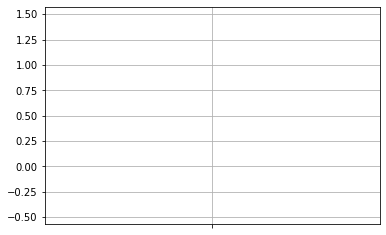

In [122]:
normalized_df = num/ num.mean()

normalized_df.loc[:,normalized_df.var()<10**(-3)].boxplot()
plt.show()


In [123]:
# drop features with low variance
num.drop(list(num.loc[:,normalized_df.var()<10**(-3)].columns),axis=1,inplace=True)
print(num.shape)

(2919, 35)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
